This is the Solved Exercise 3 from the [exercise series 1](https://github.com/righetti/optlearningcontrol/tree/master/Spring2020/series1) for the course Optimal and Learning Control (ME-GY 7973).

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

np.set_printoptions(precision=5,linewidth=120,suppress=True)

# the bisect module enables to easily keep an ordered list
# cf. https://docs.python.org/3.7/library/bisect.html
# useful for maintaining the OPEN list
import bisect

In [111]:
def breadthFirstSearch(graph, start_node, end_node, cost):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
    # we convert every point in the graph into list indices
    nodes=len(graph)
    d=np.array([])
    PARENT=np.array([])
    """   
    for i in range(nodes):
        d=np.append(d,[np.inf])
        PARENT=np.append(PARENT,None)
    """
    d=np.full(nodes, np.inf)
    PARENT=np.full(nodes, None)
    d[start_node]=0
    UPPER=np.inf
    OPEN=np.array([start_node])
    count_nodes=0
    
    while(len(OPEN)!=0):
        CURRENT = OPEN[0]
        OPEN = np.delete(OPEN,0)
        count_nodes += 1
        
        for child in graph[CURRENT]:
            temp_dist = d[CURRENT]+cost[CURRENT][child]
            if (temp_dist < min([d[child],UPPER])):
                d[child] = temp_dist 
                PARENT[child] = CURRENT
                if (child != end_node):
                    if child not in OPEN: OPEN = np.append(OPEN,child) #new nodes are added at the end of queue 
                elif (child == end_node): 
                    UPPER = temp_dist
        
    print("Number of nodes tested: ", count_nodes)
        
    path = np.array([])
    if (UPPER == np.inf): 
        return path 
    i=end_node
    while(i!=start_node):
        path=np.append([i],path)
        i = PARENT[i]
    path = np.append([i], path) 
        
    print("Length of the shortest path is ", len(path))
    return path

def depthFirstSearch(graph, start_node, end_node, cost):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
    
    # we convert every point in the graph into list indices
    nodes=len(graph)
    d=np.array([])
    PARENT=np.array([])
    """   
    for i in range(nodes):
        d=np.append(d,[np.inf])
        PARENT=np.append(PARENT,None)
    """
    d=np.full(nodes, np.inf)
    PARENT=np.full(nodes, None)
    d[start_node]=0
    UPPER=np.inf
    OPEN=np.array([start_node])
    count_nodes=0
    
    while(len(OPEN)!=0):
        CURRENT = OPEN[0]
        OPEN = np.delete(OPEN,0)
        count_nodes += 1
        
        for child in graph[CURRENT]:
            temp_dist = d[CURRENT]+cost[CURRENT][child]
            if (temp_dist < min([d[child],UPPER])):
                d[child] = temp_dist 
                PARENT[child] = CURRENT
                if (child != end_node):
                    if child not in OPEN: OPEN = np.append(child,OPEN) #new nodes are added at the start of queue 
                elif (child == end_node): 
                    UPPER = temp_dist
    
    print("Number of nodes tested: ", count_nodes)
        
    path = np.array([])
    if (UPPER == np.inf): 
        return path 
    i = end_node
    while(i != start_node):
        path = np.append([i],path)
        i = PARENT[i]
    path = np.append([i], path) 
        
    print("Length of the shortest path is ", len(path))
    return path

def AStar(graph, start_node, end_node, cost, heuristic):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
    
    # we convert every point in the graph into list indices
    nodes = len(graph) 
    
    d = np.full(nodes,np.inf) 
    d[start_node] = 0
    
    PARENT = np.full(nodes,None)
    UPPER = np.inf
    OPEN = [start_node]
    
    CLOSED = [] 

    count_nodes = 0;  
    
    #Stores cost calculated based on heuristic and is used to sort OPEN in the order of least heuristic cost(v)
    v = np.full(nodes,np.inf)
    v_score = []
    
    while(len(OPEN) != 0):

        CURRENT = OPEN[0] 
        CLOSED = np.append(CLOSED,CURRENT)
        OPEN = np.delete(OPEN,0)
        
        count_nodes += 1 
        
        if(CURRENT == end_node):
            break
        
        #for each child update its distance from start node and its parents as required
        for child in graph[CURRENT]:
            if child in CLOSED:
                continue
            temp_dist = d[CURRENT]+cost[CURRENT][child]
            if (temp_dist < min([d[child],UPPER])):
                d[child] = temp_dist 
                PARENT[child] = CURRENT
                v[child] = temp_dist+heuristic[child]
                
                #Sort OPEN based on v  
                insert_child_at = 0
                for val in OPEN:
                    if v[val]<=v[child]:
                        insert_child_at += 1
                OPEN = np.insert(OPEN,insert_child_at,child)
    
    print("Nodes Tested: ", count_nodes)
    path=np.array([])
    if (d[end_node] == np.inf):
        return path
    i = end_node
    while(i != start_node):
        path = np.append([i],path)
        i = PARENT[i]
    path = np.append([i],path)
    print("Length of shortest part : ", str(len(path)))
    return path

In [4]:
def display_result(world_mat, path):
    """
    This function displays a maze described in world_mat and a path inside the maze
    world_mat: a NxN matrix that contains the maze (0 for free path, -10 for obstacle)
    path: a list of elements numbered as the graph (i.e. from 0 to N**2-1)
    """
    N = world_mat.shape[0]
    display_mat = world_mat.copy()
    for el in path:
        display_mat[convert_to_matrixindex(el,N)] = 5
    plt.matshow(display_mat, cmap='Greys')
    
def convert_to_listindex(i,j,N):
    """
    This function converts a (i,j) matrix entry index to a list index for matrix of size N
    """
    return N*i+j

def convert_to_matrixindex(a,N):
    """
    This function converts a list entry a into a (i,j) matrix entry for matrix of size N
    """
    i = int(a/N) # the result of integer division
    j = int(a%N) # the  remainder of the division
    return i,j

def create_graph(world_mat):
    """
    This functions takes a NxN matrix in entry and creates a graph and a map of costs
    Since we use lists, for a world_mat of size NxN, we associate to the entry [i,j] of world_map
    the index a=N*i + j of the list
    output:
        graph: a list of neighbors  (indexed as explained above)
        cost: a N**2 x  N**2 array. Each entry cost[i,j] contains the cost of transitioning from node i to node j
            it is infinite if there is no edge from i to j
    """
    N = world_mat.shape[0]
    graph = []
    for i in range(N):
        for j in range(N):
            neigh = []
            if(i!=N-1):
                if(world_mat[i+1,j]==0):
                    neigh.append(N*(i+1)+j)
            if(i!=0):
                if(world_mat[i-1,j]==0):
                    neigh.append(N*(i-1)+j)
            if(j!=N-1):
                if(world_mat[i,j+1]==0):
                    neigh.append(N*i+j+1)
            if(j!=0):
                if(world_mat[i,j-1]==0):
                    neigh.append(N*i+j-1)
            graph.append(neigh)
    
    cost = np.ones([N*N,N*N]) * np.inf
    
    for i in range(N*N):
        for j in graph[i]:
            cost[i,j] = 1
    
    return graph, cost

[[ 0.  0.  0.  0. 10.]
 [ 0. 10. 10.  0.  0.]
 [ 0. 10.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0. 10. 10.  0.  0.]]


<IPython.core.display.Javascript object>


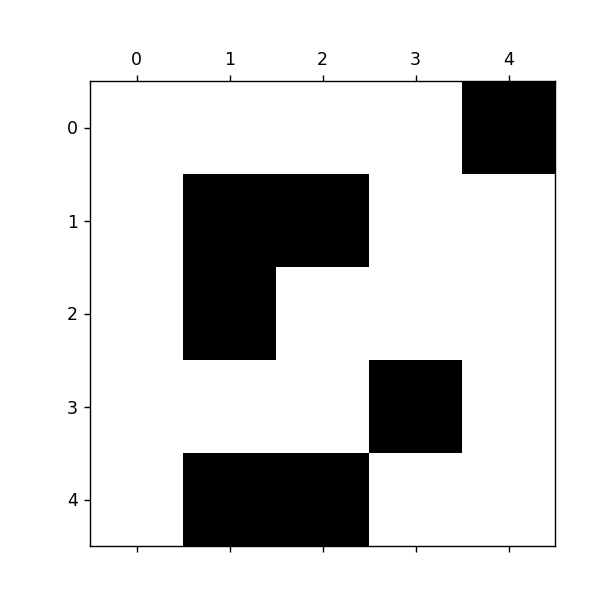

In [5]:
# let's create a map corresponding to the robot path planning example of lecture 3
# it is a 5x5 grid
world_map = np.zeros([5,5])
# and it contains obstacles which we mark as non 0
world_map[0,4] = 10
world_map[1,1:3] = 10
world_map[2,1] = 10
world_map[3,3] = 10
world_map[4,1:3] = 10

# we can print the matrix
print(world_map)

# we can now display the result
display_result(world_map, [])

<IPython.core.display.Javascript object>


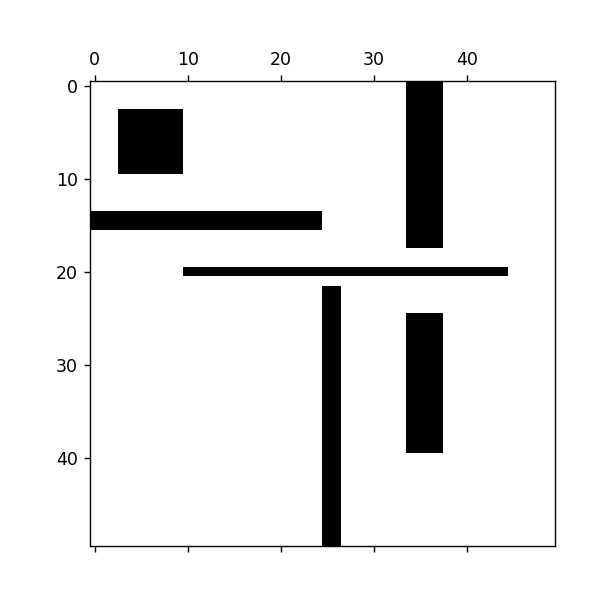

<IPython.core.display.Javascript object>


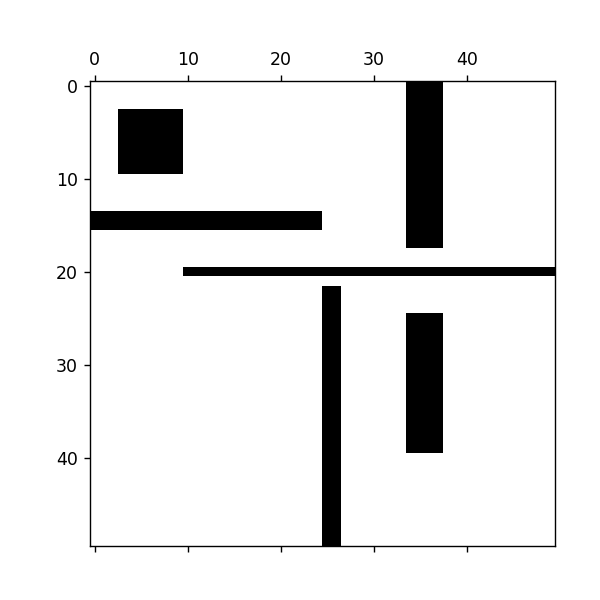

<IPython.core.display.Javascript object>


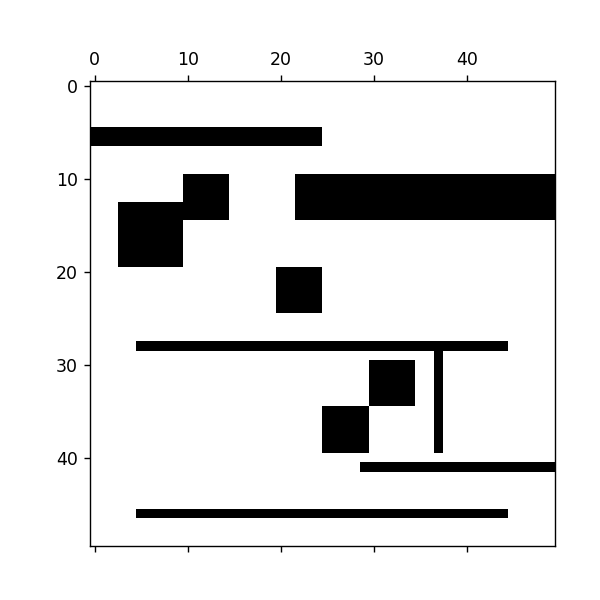

In [114]:
# here we load the 3 mazes and display them
maze1 = np.load('maze1.npy')
display_result(maze1, [])

maze2 = np.load('maze2.npy')
display_result(maze2, [])

maze3 = np.load('maze3.npy')
display_result(maze3, [])


## Part a)

Number of nodes tested:  17
Length of the shortest path is  9


<IPython.core.display.Javascript object>


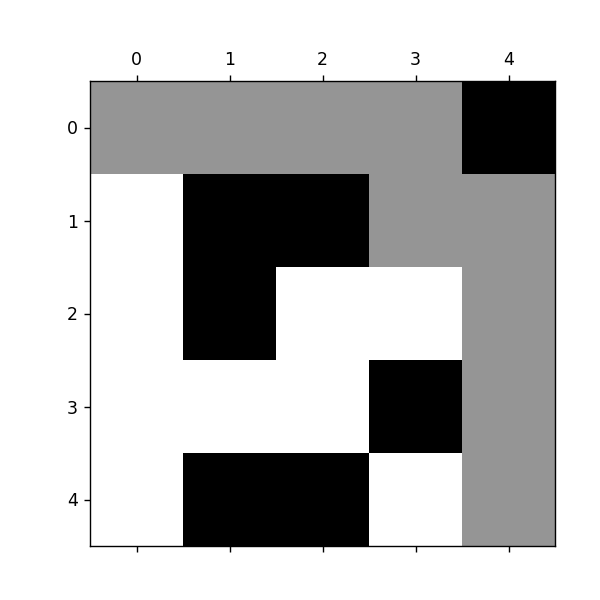

Number of nodes tested:  223241
Length of the shortest path is  99


<IPython.core.display.Javascript object>


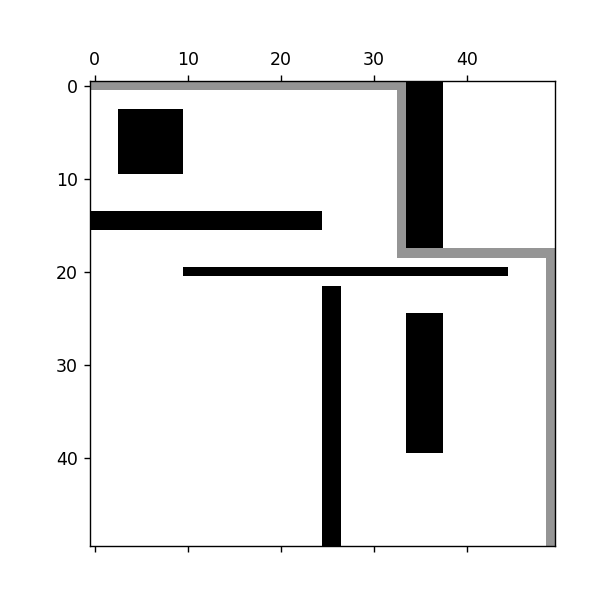

Number of nodes tested:  176721
Length of the shortest path is  131


<IPython.core.display.Javascript object>


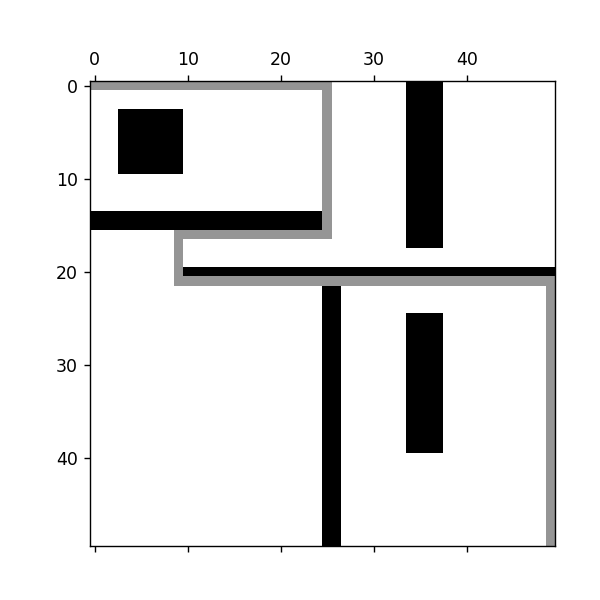

Number of nodes tested:  332734
Length of the shortest path is  141


<IPython.core.display.Javascript object>


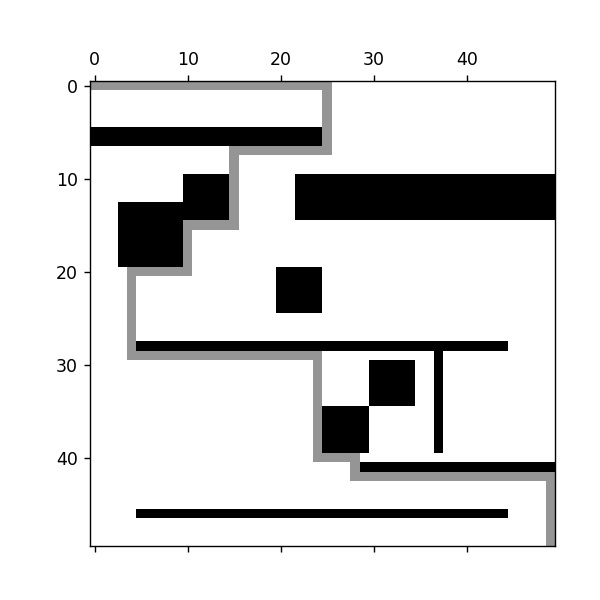

In [116]:
## Depth first search

##World_map
#Create grapgh and cost
graph,cost = create_graph(world_map)
start_node = 0
end_node = len(graph)-1

path = depthFirstSearch(graph, start_node, end_node, cost)#perform depth first search to find optimal path
#if path exists, display result
if len(path) != 0:
    display_result(world_map,path)
else:
    print("path does not exist")

## Maze1

graph,cost = create_graph(maze1)
start_node = 0
end_node = len(graph)-1

path = depthFirstSearch(graph, start_node, end_node, cost)
if len(path) != 0:
    display_result(maze1,path)
else:
    print("path does not exist")

## Maze2

graph,cost = create_graph(maze2)
start_node = 0
end_node = len(graph)-1

path = depthFirstSearch(graph, start_node, end_node, cost)
if len(path) != 0:
    display_result(maze2,path)
else:
    print("path does not exist")

## Maze3
graph,cost = create_graph(maze3)
start_node = 0
end_node = len(graph)-1

path = depthFirstSearch(graph, start_node, end_node, cost)
if len(path) != 0:
    display_result(maze3,path)
else:
    print("path does not exist")

## Part b)

Number of nodes tested:  16
Length of the shortest path is  9


<IPython.core.display.Javascript object>


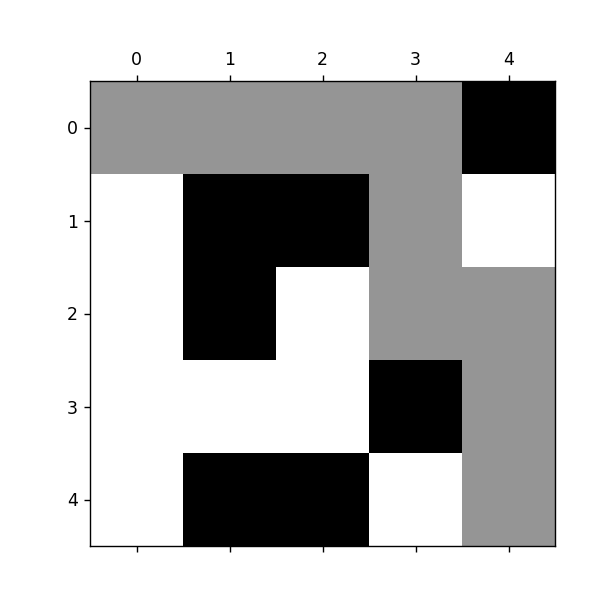

Number of nodes tested:  2024
Length of the shortest path is  99


<IPython.core.display.Javascript object>


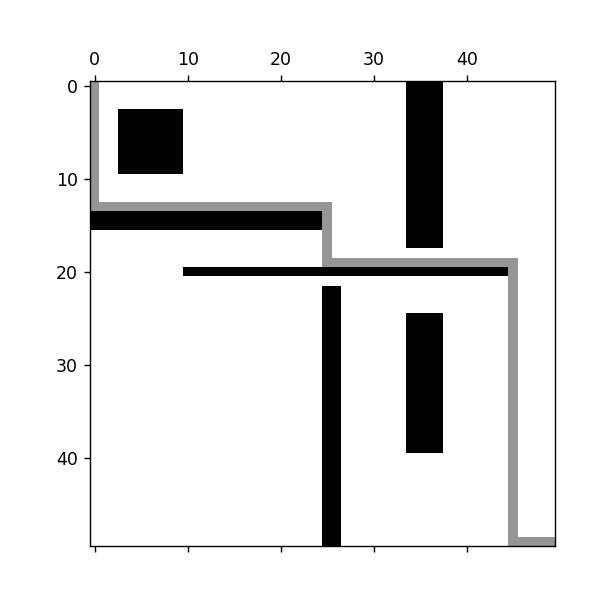

Number of nodes tested:  2172
Length of the shortest path is  131


<IPython.core.display.Javascript object>


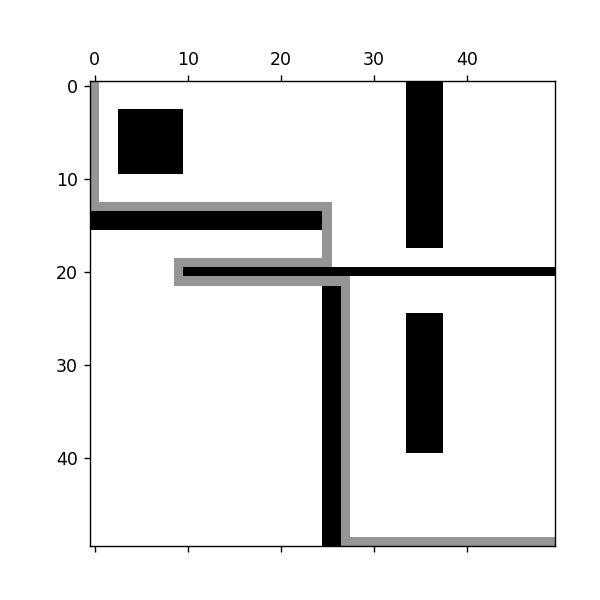

Number of nodes tested:  2048
Length of the shortest path is  141


<IPython.core.display.Javascript object>


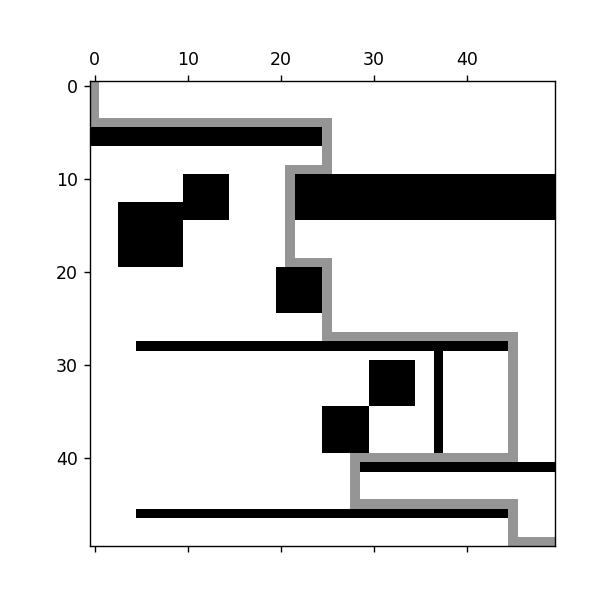

In [115]:
## Breadth first search

##World_map
#Create grapgh and cost
graph,cost = create_graph(world_map)
start_node = 0
end_node = len(graph)-1


path = breadthFirstSearch(graph, start_node, end_node, cost) #perform breadth first search to find optimal path
#if path exists, display result
if len(path) != 0:
    display_result(world_map,path)
else:
    print("path does not exist")

## Maze1
graph,cost = create_graph(maze1)
start_node = 0
end_node = len(graph)-1


path = breadthFirstSearch(graph, start_node, end_node, cost)
if len(path) != 0:
    display_result(maze1,path)
else:
    print("path does not exist")
    

## Maze2
graph,cost = create_graph(maze2)
start_node = 0
end_node = len(graph)-1


path = breadthFirstSearch(graph, start_node, end_node, cost)
if len(path) != 0:
    display_result(maze2,path)
else:
    print("path does not exist")


## Maze3
graph,cost = create_graph(maze3)
start_node = 0
end_node = len(graph)-1


path = breadthFirstSearch(graph, start_node, end_node, cost)
if len(path) != 0:
    display_result(maze3,path)
else:
    print("path does not exist")


## Part c)

Nodes Tested:  17
Length of shortest part :  9


<IPython.core.display.Javascript object>


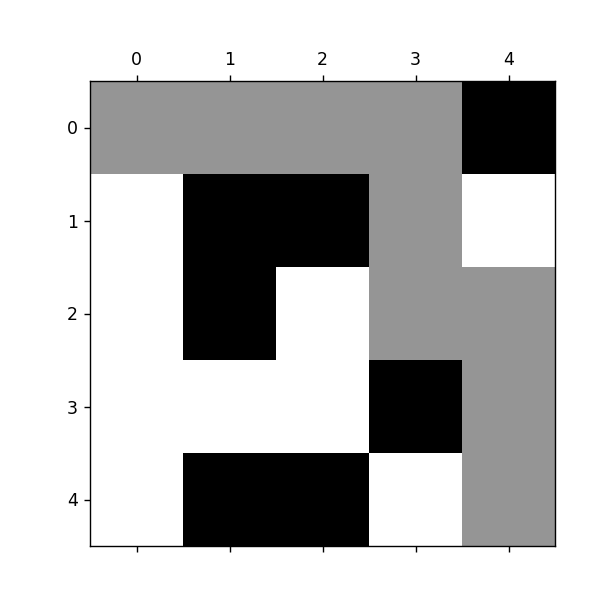

Nodes Tested:  12
Length of shortest part :  11


<IPython.core.display.Javascript object>


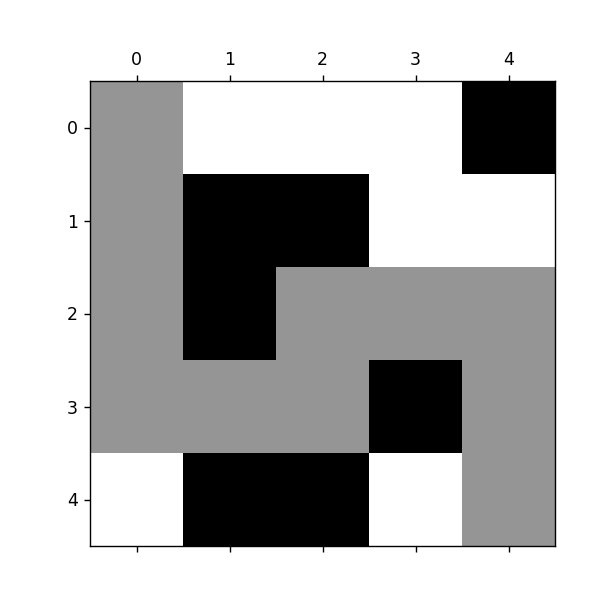

Nodes Tested:  2025
Length of shortest part :  99


<IPython.core.display.Javascript object>


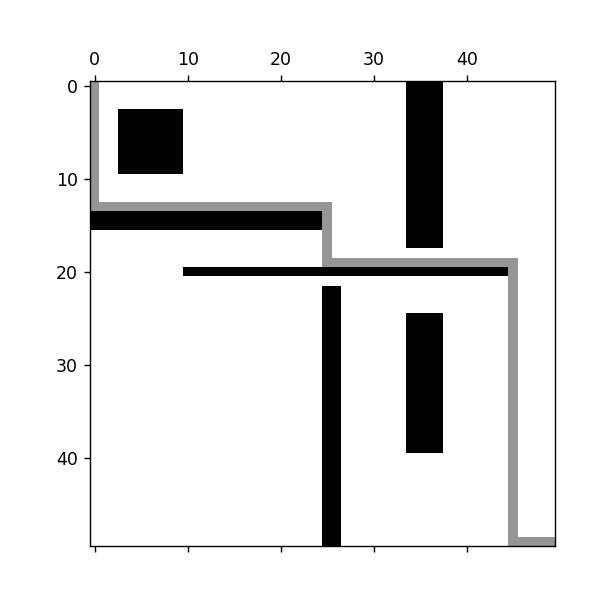

Nodes Tested:  99
Length of shortest part :  99


<IPython.core.display.Javascript object>


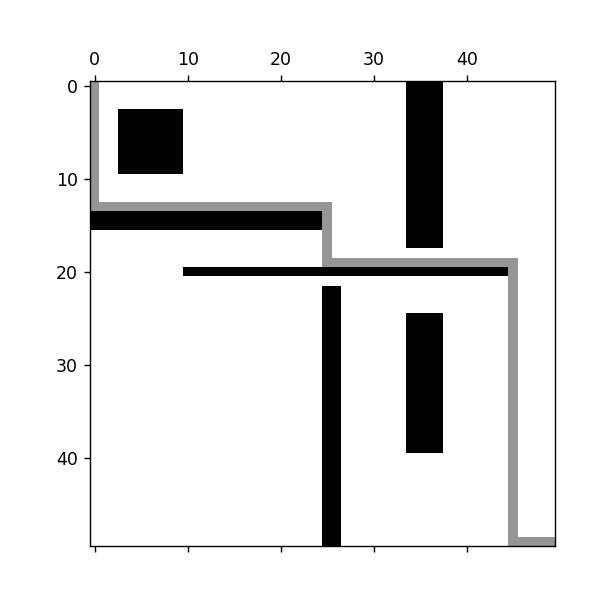

Nodes Tested:  2173
Length of shortest part :  131


<IPython.core.display.Javascript object>


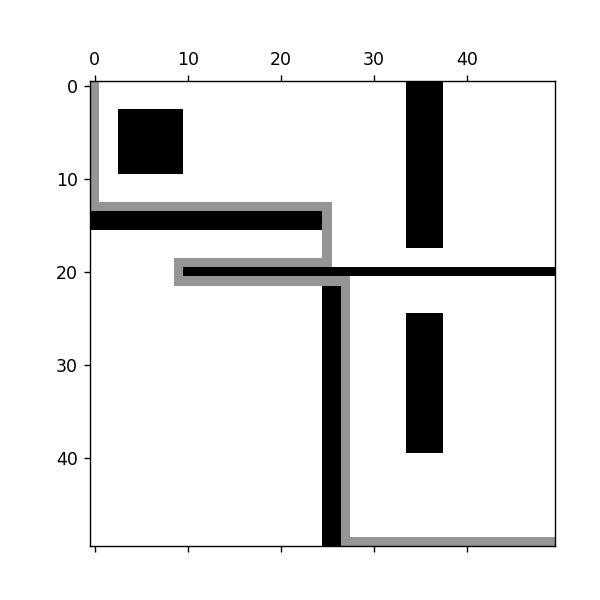

Nodes Tested:  1464
Length of shortest part :  131


<IPython.core.display.Javascript object>


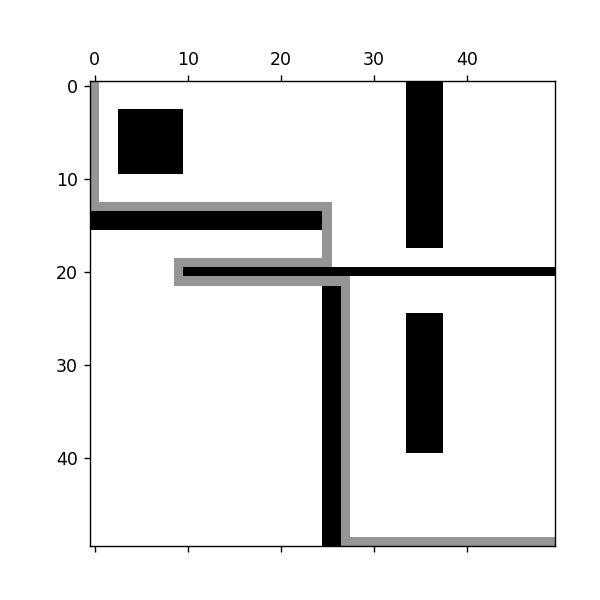

Nodes Tested:  2049
Length of shortest part :  141


<IPython.core.display.Javascript object>


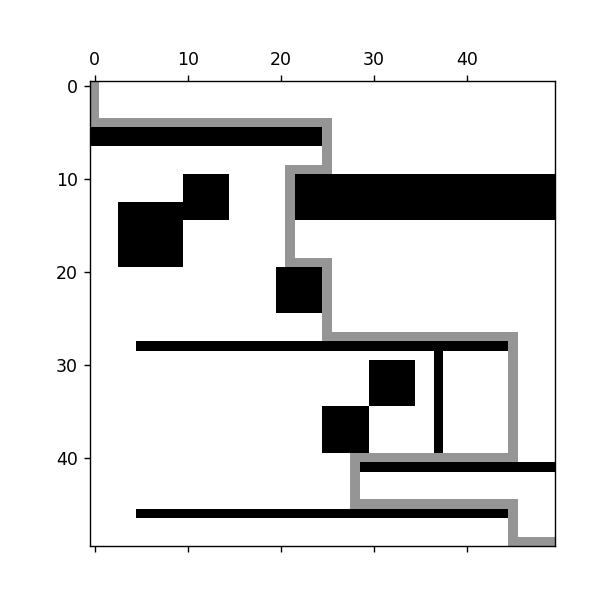

Nodes Tested:  169
Length of shortest part :  141


<IPython.core.display.Javascript object>


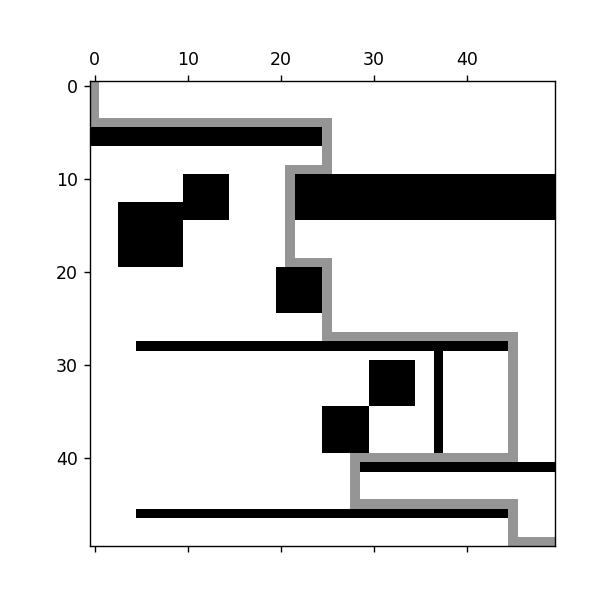

In [117]:
# A*


##World_map

graph,cost = create_graph(world_map)
start_node = 0
end_node = len(graph)-1

#generate heuristic = 0 for every node
heuristic = np.zeros(len(graph))
path = AStar(graph, start_node, end_node, cost, heuristic)#perform A* search to find optimal path
#if path exists, display result

if len(path) != 0:
    display_result(world_map,path)
else:
    print("path does not exist")

#generate heuristic = |x-goal_x| + |y-goal_y| for every node    
N = len(graph)
goal_x,goal_y = convert_to_matrixindex(end_node,N)
for i in range(N):
    x,y = convert_to_matrixindex(i,N)
    heuristic[i] = abs(x-goal_x) + abs(y-goal_y)

path = AStar(graph, start_node, end_node, cost, heuristic) #perform A* search to find optimal path
#if path exists, display result
if len(path) != 0:
    display_result(world_map,path)
else:
    print("path does not exist")
    
## Maze1
graph,cost = create_graph(maze1)
start_node = 0
end_node = len(graph)-1

heuristic = np.zeros(len(graph))
path = AStar(graph, start_node, end_node, cost, heuristic)

if len(path) != 0:
    display_result(maze1,path)
else:
    print("path does not exist")

    
N = len(graph)
goal_x,goal_y = convert_to_matrixindex(end_node,N)
for i in range(N):
    x,y = convert_to_matrixindex(i,N)
    heuristic[i] = abs(x-goal_x) + abs(y-goal_y)

path = AStar(graph, start_node, end_node, cost, heuristic)

if len(path) != 0:
    display_result(maze1,path)
else:
    print("path does not exist")
    
## Maze2
graph,cost = create_graph(maze2)
start_node = 0
end_node = len(graph)-1

heuristic = np.zeros(len(graph))
path = AStar(graph, start_node, end_node, cost, heuristic)

if len(path) != 0:
    display_result(maze2,path)
else:
    print("path does not exist")

    
N = len(graph)
goal_x,goal_y = convert_to_matrixindex(end_node,N)
for i in range(N):
    x,y = convert_to_matrixindex(i,N)
    heuristic[i] = abs(x-goal_x) + abs(y-goal_y)

path = AStar(graph, start_node, end_node, cost, heuristic)

if len(path) != 0:
    display_result(maze2,path)
else:
    print("path does not exist")
    
 ## Maze3
graph,cost = create_graph(maze3)
start_node = 0
end_node = len(graph)-1

heuristic = np.zeros(len(graph))
path = AStar(graph, start_node, end_node, cost, heuristic)

if len(path) != 0:
    display_result(maze3,path)
else:
    print("path does not exist")

    
N = len(graph)
goal_x,goal_y = convert_to_matrixindex(end_node,N)
for i in range(N):
    x,y = convert_to_matrixindex(i,N)
    heuristic[i] = abs(x-goal_x) + abs(y-goal_y)

path = AStar(graph, start_node, end_node, cost, heuristic)

if len(path) != 0:
    display_result(maze3,path)
else:
    print("path does not exist")
    
    

Good heuristics are always under-estimatord of the cost-to-go. This is to prevent the algorithm from taking a non-optimal path. If the heuristics are more than the cost-to-go, then the algorithm will try and move away from the large values which are currently not bound by the cost-to-go which makes the output as random as the heuristics and non-optimal.

## Part d)

Pros and cons of each of the algorithms:
<ul>
    
<li><b>Depth First Search</b> is a good only for small maps. The number of nodes tested are quite large compared to both the other algorithms. However, the memory usage of this algorithm is less than that on Breadth First Search.</li>

<li><b>Breadth First Search</b> algorithm uses more memory to keep checking every node as it goes down the tree (/points in map), however it seem to be slightly faster in terms of giving an optimal path even in a large map.</li>

<li><b>A*</b> takes the least memory and is the fastest of the three algorithms, however this algorithm is only as good as the heuristics of the map. This is the reason why the number of nodes tested for maze three using different huristics is different and clearly one of them is far better than the other.<\li>